In [19]:
from google.cloud import bigquery
from google.oauth2 import service_account

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import numpy as np

In [2]:
credentials = service_account.Credentials.from_service_account_file('{BQ_SERVICE_ACCOUNT_DIR}')

project_id = 'loyal-saga-416712'
client = bigquery.Client(credentials= credentials,project=project_id)

In [40]:
query = client.query("""
   SELECT * FROM `loyal-saga-416712.marketing_analytics_dwh.mart_customer_rfm`
 """)

rfm_df = query.to_dataframe()

In [41]:
rfm_df

,customer_id,customer_name_hashed,customer_recency,customer_frequency,customer_monetary
0,18,b'\xa1Q\x18A\x17\xbb\xcd\x82\x90\xbd\x8d\xb4\x...,9,12,15773124.0
1,5,b'<^oa\xc6b\xfc8\x12\x9e\xdb\x87\xf8\xa2\xc3\xc8',88,6,5223750.0
2,41,"b'\xc3u\x94\xdf\xa9.""\xaf\x0b.\xe0z\x95\xeaR\xd1'",3,6,9227764.0
3,0,b'b\xe7b\xc11_\xe4\xf6\xd2\xcc\xb7e\xed\x9b\x0f@',24,4,2906000.0
4,33,"b""PA\x0c\xbe\xe3>\xf3\x19\xf0'DX\xc4\x8e$%""",21,10,8601000.0
5,12,b'G\x1f3\xd4\xa3\xa7\x11\x0b\xdd\x8e\xf4Y\x1cLUj',43,9,9029000.0
6,17,b'w\xa8\xf8\xfd.\xf7\xabor\xa3a\xb5\xf9\x90\x93o',30,8,26736000.0
7,32,b':k\xacU=\xa0\xe7B\xa8\xfd\xde\xb5\xcerL\x8e',37,6,10021000.0
8,53,b'\xfc\x8e\x08e\xc1\x9a\x9f\x80\xea\x92U\x99X\...,9,11,12475350.0
9,35,b'\xd0\xe3\xe8`L\x83\xe03\xd3\xe7\\\xf6\xa3\xd...,1,14,19581280.0


In [42]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           55 non-null     Int64  
 1   customer_name_hashed  55 non-null     object 
 2   customer_recency      55 non-null     Int64  
 3   customer_frequency    55 non-null     Int64  
 4   customer_monetary     55 non-null     float64
dtypes: Int64(3), float64(1), object(1)
memory usage: 2.4+ KB


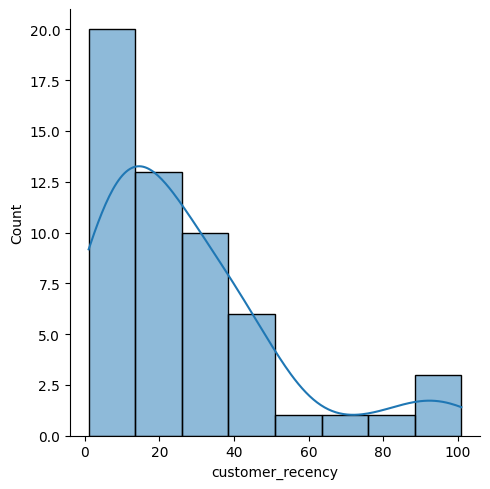

In [43]:
sns.displot(data=rfm_df, x='customer_recency', kde=True);

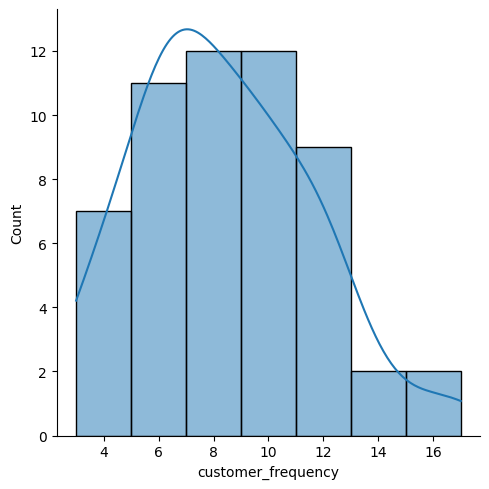

In [44]:
sns.displot(data=rfm_df, x='customer_frequency', kde=True);

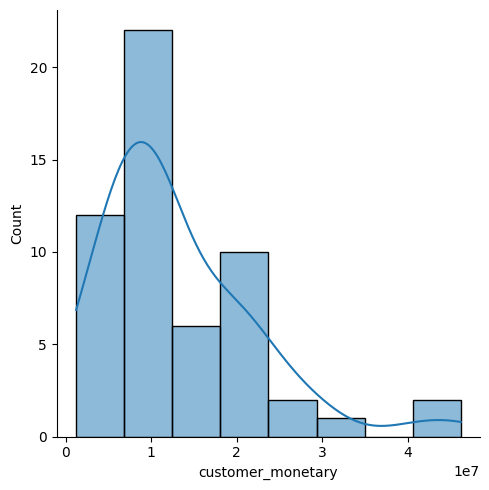

In [45]:
sns.displot(data=rfm_df, x='customer_monetary', kde=True);

In [46]:
rfm_metrics = rfm_df.drop(['customer_name_hashed','customer_id'], axis=1)

In [47]:
# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
scaler.fit(rfm_metrics)
rfm_metrics_normalized = scaler.transform(rfm_metrics)

In [48]:
pd.DataFrame(rfm_metrics_normalized)

,0,1,2
0,-0.740246,1.155471,0.283834
1,2.502060,-0.751056,-0.876025
2,-0.986497,-0.751056,-0.435801
3,-0.124618,-1.386565,-1.130852
4,-0.247744,0.519962,-0.504711
5,0.655177,0.202207,-0.457654
6,0.121633,-0.115547,1.489155
7,0.408926,-0.751056,-0.348588
8,-0.740246,0.837717,-0.078742
9,-1.068581,1.790980,0.702524


In [49]:
# Assert that it has mean 0 and variance 1
print(rfm_metrics_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(rfm_metrics_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0.  0. -0.]
[1. 1. 1.]


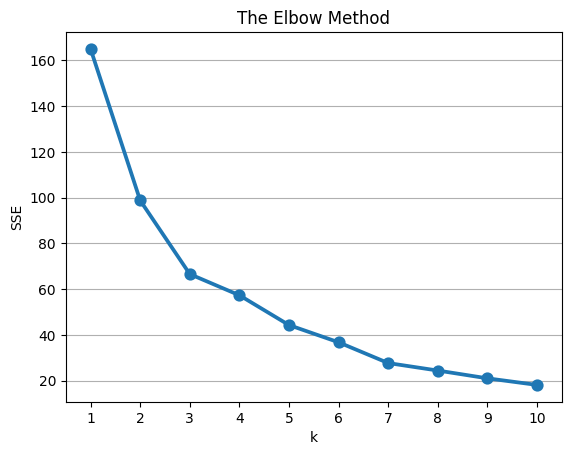

In [50]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_metrics_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid()
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [51]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm_metrics_normalized)
model.labels_.shape

(55,)

In [53]:
rfm_cluster_df = rfm_df.copy()
rfm_cluster_df["Cluster"] = model.labels_
rfm_cluster_df

,customer_id,customer_name_hashed,customer_recency,customer_frequency,customer_monetary,Cluster
0,18,b'\xa1Q\x18A\x17\xbb\xcd\x82\x90\xbd\x8d\xb4\x...,9,12,15773124.0,1
1,5,b'<^oa\xc6b\xfc8\x12\x9e\xdb\x87\xf8\xa2\xc3\xc8',88,6,5223750.0,2
2,41,"b'\xc3u\x94\xdf\xa9.""\xaf\x0b.\xe0z\x95\xeaR\xd1'",3,6,9227764.0,0
3,0,b'b\xe7b\xc11_\xe4\xf6\xd2\xcc\xb7e\xed\x9b\x0f@',24,4,2906000.0,0
4,33,"b""PA\x0c\xbe\xe3>\xf3\x19\xf0'DX\xc4\x8e$%""",21,10,8601000.0,0
5,12,b'G\x1f3\xd4\xa3\xa7\x11\x0b\xdd\x8e\xf4Y\x1cLUj',43,9,9029000.0,0
6,17,b'w\xa8\xf8\xfd.\xf7\xabor\xa3a\xb5\xf9\x90\x93o',30,8,26736000.0,1
7,32,b':k\xacU=\xa0\xe7B\xa8\xfd\xde\xb5\xcerL\x8e',37,6,10021000.0,0
8,53,b'\xfc\x8e\x08e\xc1\x9a\x9f\x80\xea\x92U\x99X\...,9,11,12475350.0,1
9,35,b'\xd0\xe3\xe8`L\x83\xe03\xd3\xe7\\\xf6\xa3\xd...,1,14,19581280.0,1


In [54]:
rfm_cluster_df.groupby('Cluster').agg({
    'customer_recency':'mean',
    'customer_frequency':'mean',
    'customer_monetary':['mean', 'count']}).round(2)

customer_recency customer_frequency customer_monetary      
                    mean               mean              mean count
Cluster                                                            
0                   22.0               7.04        8763010.89    27
1                  16.43              11.29       21603266.76    21
2                  78.29               4.71        5037850.43     7

In [55]:
rfm_cluster_df.groupby('Cluster').agg({
    'customer_recency':'median',
    'customer_frequency':'median',
    'customer_monetary':['median', 'count']}).round(2)

customer_recency customer_frequency customer_monetary      
                  median             median            median count
Cluster                                                            
0                   21.0                7.0         8945000.0    27
1                    9.0               12.0        19513000.0    21
2                   88.0                4.0         4469000.0     7

In [59]:
# Create the dataframe
rfm_cluster_df_normalized = pd.DataFrame(rfm_metrics_normalized, columns=['customer_recency', 'customer_frequency', 'customer_monetary'])
rfm_cluster_df_normalized['customer_id'] = rfm_cluster_df['customer_id']
rfm_cluster_df_normalized['customer_name_hashed'] = rfm_cluster_df['customer_name_hashed']
rfm_cluster_df_normalized['Cluster'] = rfm_cluster_df['Cluster']

In [60]:
rfm_cluster_df_normalized.head()

,customer_recency,customer_frequency,customer_monetary,customer_id,customer_name_hashed,Cluster
0,-0.740246,1.155471,0.283834,18,b'\xa1Q\x18A\x17\xbb\xcd\x82\x90\xbd\x8d\xb4\x...,1
1,2.502060,-0.751056,-0.876025,5,b'<^oa\xc6b\xfc8\x12\x9e\xdb\x87\xf8\xa2\xc3\xc8',2
2,-0.986497,-0.751056,-0.435801,41,"b'\xc3u\x94\xdf\xa9.""\xaf\x0b.\xe0z\x95\xeaR\xd1'",0
3,-0.124618,-1.386565,-1.130852,0,b'b\xe7b\xc11_\xe4\xf6\xd2\xcc\xb7e\xed\x9b\x0f@',0
4,-0.247744,0.519962,-0.504711,33,"b""PA\x0c\xbe\xe3>\xf3\x19\xf0'DX\xc4\x8e$%""",0


In [61]:
# Melt The Data
rfm_cluster_df_normalized_melt = pd.melt(rfm_cluster_df_normalized,
                                          id_vars=['customer_id', 'customer_name_hashed', 'Cluster'],
                                          value_vars=['customer_recency','customer_frequency','customer_monetary'],
                                          var_name='metrics',
                                          value_name='value')
rfm_cluster_df_normalized_melt

,customer_id,customer_name_hashed,Cluster,metrics,value
0,18,b'\xa1Q\x18A\x17\xbb\xcd\x82\x90\xbd\x8d\xb4\x...,1,customer_recency,-0.740246
1,5,b'<^oa\xc6b\xfc8\x12\x9e\xdb\x87\xf8\xa2\xc3\xc8',2,customer_recency,2.502060
2,41,"b'\xc3u\x94\xdf\xa9.""\xaf\x0b.\xe0z\x95\xeaR\xd1'",0,customer_recency,-0.986497
3,0,b'b\xe7b\xc11_\xe4\xf6\xd2\xcc\xb7e\xed\x9b\x0f@',0,customer_recency,-0.124618
4,33,"b""PA\x0c\xbe\xe3>\xf3\x19\xf0'DX\xc4\x8e$%""",0,customer_recency,-0.247744
...,...,...,...,...,...
160,1,"b'\xa7""\x9cf\xa17\x8c\x80T\xa5\'\x84\x80\x88Dr'",1,customer_monetary,0.741827
161,39,b'l\xb7t\xd2\xa8\x92\xd7NJ\xea2\x8c\x83\xa5\x8c(',1,customer_monetary,1.035643
162,40,b'\x16v\x0b\xe0u\xfc\xf4\xfa\x80;\xf33\xca\x1d...,0,customer_monetary,-0.220714
163,20,b'\xcdN\xec!\xb7\xa8\xa6\xac\xfbj-\x10\xc4]\x18c',2,customer_monetary,-1.033912


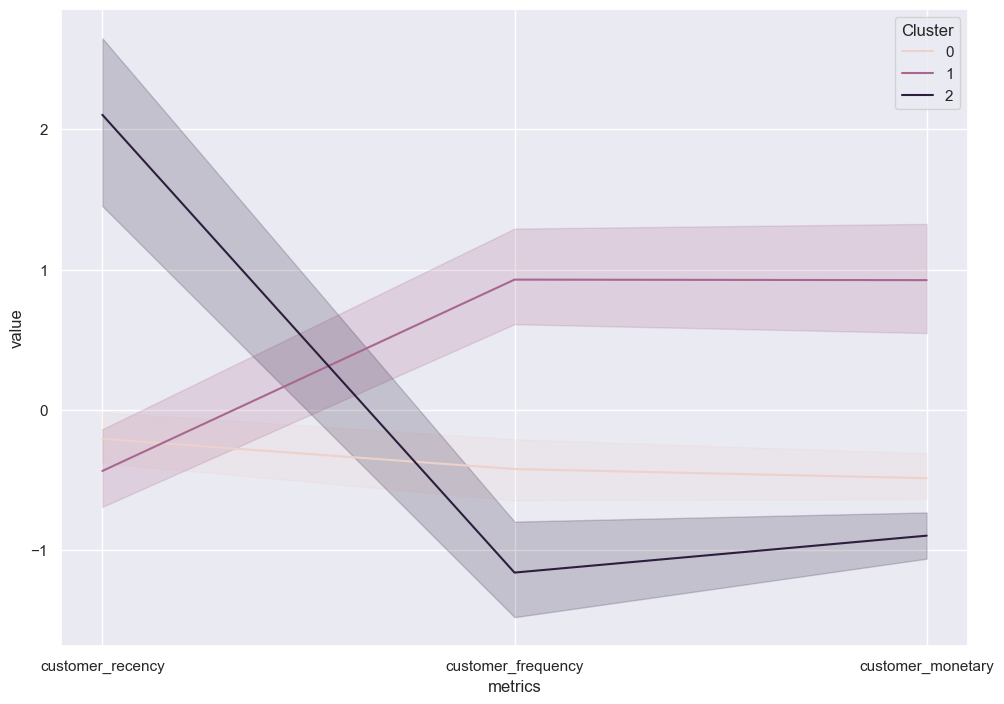

In [65]:
# Visualize the RFM
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='metrics', y='value', hue='Cluster', data=rfm_cluster_df_normalized_melt);

### Note

1. Recency : Lower is better
2. Frequency : Higher is better
3. Monetary : Higher is Better

### Segmentation of the customer as per the result of K-Means clustering

Cluster 0 are the customers who recently purchased our product, but less frequent and less to spend. It could be a group of **new customers**

Cluster 1 are the customers who recently purchased our product, with the highest frequency and highest monetary value. It could be a group of **loyal customers**

Cluster 2 are the customers who purchased our product long time ago, less frequent, and less to spend. It could be a group of **churned customers**